In [1]:
import pandas as pd
import numpy as np
import scipy.stats as Stats 

### Modelling for mpg as an dependent variable

In [8]:
car = pd.read_csv("mtcars.csv")

In [9]:
car.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [11]:
car.describe(include="all")

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


# Splitting the dependent and independent variables

In [13]:
#All the independent variables in a single df 
x= car.iloc[:,1:] 

In [14]:
x.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [15]:
y=car['mpg']

In [16]:
y.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

# Cross Validation 
only if ML is SUPERVISED

In [18]:
# Syntax of cross-validation
#train_test_split(independent var, dependent var, train_size=0.7,test_size=1-0.7,random_state=)

X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=10)

In [20]:
X_train.shape

(22, 10)

In [21]:
X_train.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,4,71.1,65,4.22,1.835,19.90,1,1,4,1
14,8,472.0,205,2.93,5.250,17.98,0,0,3,4
18,4,75.7,52,4.93,1.615,18.52,1,1,4,2
6,8,360.0,245,3.21,3.570,15.84,0,0,3,4
11,8,275.8,180,3.07,4.070,17.40,0,0,3,3


In [26]:
print(X_test.shape)
X_test.head()

(10, 10)


,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
20,4,120.1,97,3.70,2.465,20.01,1,0,3,1
7,4,146.7,62,3.69,3.190,20.00,1,0,4,2
5,6,225.0,105,2.76,3.460,20.22,1,0,3,1
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1


In [23]:
y_train.shape

(22,)

In [24]:
y_test.shape

(10,)

# Modelling

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=None)
#Creating a instance so that we could use it many times and setting hyperparameters

In [32]:
lm

LinearRegression()

In [33]:
# TRAINING THE DATA
lm.fit(X_train,y_train)

LinearRegression()

In [36]:
#Coefficients (b1,b2,...) for the model y=b0+b1x1+b2x2+....
lm.coef_

array([ 2.05231620e+00,  5.48342171e-03, -1.00269377e-03,  2.10867217e+00,
       -2.49877537e+00,  1.00697541e+00,  2.39806781e+00,  5.29222558e+00,
        3.09107153e+00, -1.97098295e+00])

In [37]:
#Intercept b0
lm.intercept_

-19.79610332377898

In [38]:
X_train.columns

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

# Equation of model
mpg = -19.79 + (2.05)cyl + (5.48)disp ....

In [41]:
#R-squared value
lm.score(X_train,y_train)

0.9239622825476583

# Prediction 

In [43]:
y_pred = lm.predict(X_test)
y_pred

array([20.46694227, 19.92521554, 20.88179557, 28.05675844, 21.55926925,
       17.55892006, 16.46834489, 26.72466966, 16.1904935 , 21.23598869])

In [44]:
err = y_pred - y_test
err_df = pd.DataFrame(err)
err_df

,mpg
20,-1.033058
7,-4.474784
5,2.781796
2,5.256758
3,0.159269
21,2.058920
13,1.268345
28,10.924670
12,-1.109507
1,0.235989


array([[<AxesSubplot:title={'center':'mpg'}>]], dtype=object)

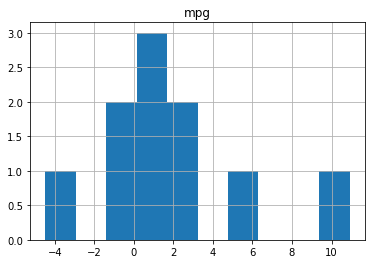

In [45]:
err_df.hist(column="mpg") #Error should be in normal distribution

In [46]:
lm.score(X_test,y_test)

-0.8418675256717296

# Root Mean Squared Errors(RMSE)

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

18.29711200002296

In [50]:
import math
math.sqrt(mse)

4.277512361177108

In [52]:
from sklearn import metrics
metrics.r2_score(y_pred,y_test)

-0.3086852234849726

# Linear Regression using statsmodel

In [54]:
adv = pd.read_csv("Advertising.csv")

In [55]:
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [56]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

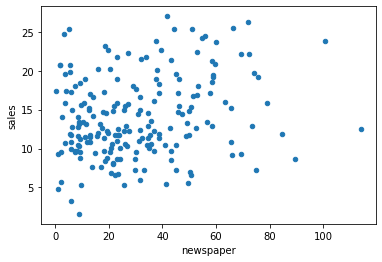

In [59]:
#Relationship b/w dependent and independent variable
adv.plot(kind="scatter",x='newspaper',y='sales')

Cross Validation

In [60]:
from statsmodels.formula.api import ols

In [62]:
# ols(formula='y = x1+x2+x3',data=df).fit()
lmodel = ols(formula='sales ~ TV + radio + newspaper',data=adv).fit()

In [63]:
lmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        22:02:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Logistic regression in LogisticReg & KNN.ipynb